# Check seasonality of gasoline prices

In [1]:
#Import packages and data.

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
root = '/Users/yanglanlan/Desktop/IAQF'
df=pd.read_csv(root + '/Weekly_U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices.csv',index_col = 'Week', dayfirst = True)
df

,GasolinePrices
Week,
01/3/2000,1.312
01/10/2000,1.304
01/17/2000,1.318
01/24/2000,1.354
01/31/2000,1.355
...,...
12/28/2020,2.330
01/4/2021,2.336
01/11/2021,2.403


# Data  processing

In [2]:
#Recognized the index column as date and drop any missing values.

df.index = pd.to_datetime(df.index)
df.dropna(how='any', inplace=True)
df

,GasolinePrices
Week,
2000-01-03,1.312
2000-01-10,1.304
2000-01-17,1.318
2000-01-24,1.354
2000-01-31,1.355
...,...
2020-12-28,2.330
2021-01-04,2.336
2021-01-11,2.403


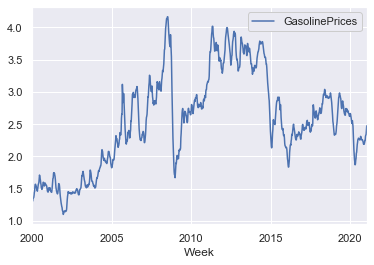

In [8]:
# Plot gasoline price graph.

df.plot()
plt.legend(framealpha=1, frameon=True)

# NO outliers observed.

# Seasonality Decomposition

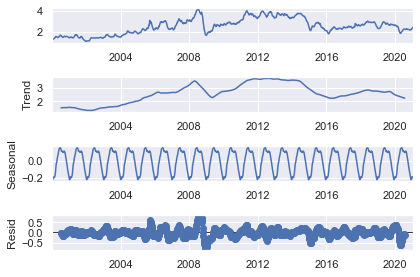

In [3]:
# Identify seasonality, using default frequency, additive model (y_observe = trend + seasonality + residual).

result = seasonal_decompose(df, model='additive')
result.plot()
pyplot.show()

# Seasonality is obvious.

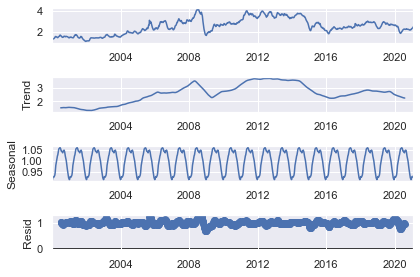

In [4]:
# Check result under multiplicative model (y_observe = trend * seasonality * residual).

result2 = seasonal_decompose(df, model='multiplicative')
result2.plot()
pyplot.show()

# Seasonality is still observed, but residual seems a lot quiet.

In [5]:
# Take a small portion to see more clearly. Take first two years' data.

cut = df.iloc[:110, :]
cut

,GasolinePrices
Week,
2000-01-03,1.312
2000-01-10,1.304
2000-01-17,1.318
2000-01-24,1.354
2000-01-31,1.355
...,...
2002-01-07,1.152
2002-01-14,1.152
2002-01-21,1.146


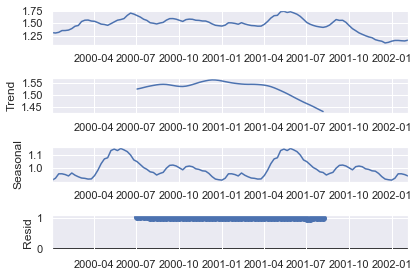

In [6]:
result3 = seasonal_decompose(cut, model='multiplicative')
result3.plot()
pyplot.show()

# Gasoline prices grow in spring, peak in summer and drop in fall and winter every year. 